<a href="https://colab.research.google.com/github/dragoa/MachineLearning/blob/main/TAI/00-Introduction_to_the_SecML_library/00_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN classification
Let's try to implement a KNN classification algorithm for recognising digits from the MNIST dataset.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import numpy as np

In [2]:
# Load the MNIST dataset
mnist = datasets.load_digits()
print(mnist.data.shape)

(1797, 64)


In [3]:
# Split the dataset into 3 parts: learning, validation, testing
Xlv, Xt, ylv, yt = train_test_split(mnist.data, mnist.target, test_size=.1, random_state=42)

print(Xlv.shape, type(Xlv))
print(Xt.shape, type(Xt))

(1617, 64) <class 'numpy.ndarray'>
(180, 64) <class 'numpy.ndarray'>


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

"""
We want to find which is the best value for k between 0 and 30 and step=2
"""
ytt = np.asarray([]) # All the true values
ypp = np.asarray([]) # All the predictions

for k in range(1,30,2):
  # grid of values that we are searching
  grid = {'n_neighbors': range(1,30,2)}

  # what we want to minimize
  MS = GridSearchCV(estimator = KNeighborsClassifier(),
                    param_grid = grid,
                    scoring = 'neg_mean_absolute_error',
                    cv = 10)

  # I apply the model selection on my data
  H = MS.fit(Xlv,ylv)

  # I put the best hyperparameters that I found
  Model = KNeighborsClassifier(n_neighbors=H.best_params_['n_neighbors'])

  # I retrain my model
  Model.fit(Xlv,ylv)
  
  # Final prediction
  predictions = Model.predict(Xt)

  ytt = np.concatenate((ytt,yt),axis=0)
  ypp = np.concatenate((ypp,predictions),axis=0)
  print(ytt.shape)

# print the best hyperparameter 
print(H.best_params_['n_neighbors'])
print("Accuracy: "+str(accuracy_score(ytt, ypp)))

C:\Users\drago\anaconda3\envs\test\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\drago\anaconda3\envs\test\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


(180,)
(360,)
(540,)
(720,)
(900,)
(1080,)
(1260,)
(1440,)
(1620,)
(1800,)
(1980,)
(2160,)
(2340,)
(2520,)
(2700,)
3
Accuracy: 0.9833333333333333


In [5]:
# Absulute error
np.mean(np.abs(ytt-ypp))

0.07222222222222222

In [6]:
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(ytt, ypp))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       255
         1.0       1.00      1.00      1.00       165
         2.0       1.00      1.00      1.00       255
         3.0       0.94      1.00      0.97       255
         4.0       0.96      1.00      0.98       375
         5.0       1.00      1.00      1.00       330
         6.0       1.00      1.00      1.00       285
         7.0       1.00      0.95      0.97       285
         8.0       1.00      1.00      1.00       120
         9.0       0.96      0.92      0.94       375

    accuracy                           0.98      2700
   macro avg       0.99      0.99      0.99      2700
weighted avg       0.98      0.98      0.98      2700


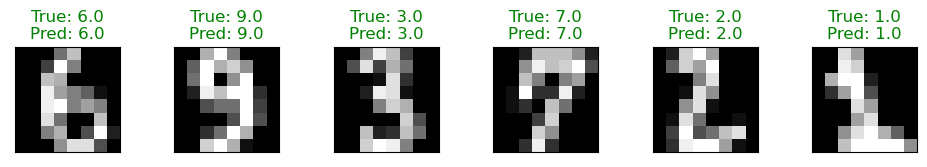

In [7]:
import matplotlib.pyplot as plt

n_display = 6

plt.figure(figsize=(n_display*2, 3))
for idx in range(n_display):
    plt.subplot(2, n_display, idx + 1)
    plt.xticks([])
    plt.yticks([])
    img = Xt[idx].reshape((8, 8))  # Reshape the image to 8x8
    plt.imshow(img, cmap='gray')
    title = f"True: {ytt[idx]}\nPred: {ypp[idx]}"
    color = "green" if ytt[idx] == ypp[idx] else "red"
    plt.title(title, color=color)

plt.show()